# Introduction to Data Science with Python 
## Natural Language Processing (NLP)

This notebook contains exercises for getting started with Natual Language Processing in Python. The main topics we will cover in this class are:

Introduction
1. newsgroups dataset
- Bag of words prediciton model

Advanced Language Processing with NLTK 
1. Tokenizing
- Stemming
- Speech Tagging
- Named Entity Recognition
- Term Frequency - Inverse Document Frequency
- Latent Dirichlet Allocation
- Regex

Other:
- Analysing data with the Alchemy API - http://www.alchemyapi.com/

## Bag of Words Prediction

We will use the [20 Newsgroup dataset](http://qwone.com/~jason/20Newsgroups/), which is provided by Scikit-Learn. This is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques, such as text classification and text clustering.

We will restrict the analysis to 4 groups and will attempt to classify them starting from the corresponding text.

This is a typical example of text classification, where a data scientist's task is to train a model that can partition text in pre-defined categories. Other examples include sentiment analysis and topic assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [5]:

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=('headers', 'footers', 'quotes'))

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=('headers', 'footers', 'quotes'))

## 1. Data inspection

We have downloaded a few newsgroup categories and removed headers, footers and quotes.

Let's inspect them.

1. What data taype is `data_train`
> sklearn.datasets.base.Bunch
- Is it like a list? Or like a Dictionary? or what?
> Dict
- How many data points does it contain?
- Inspect the first data point, what does it look like?
> A blurb of text

In [6]:
data_train.data[2]

u"\n >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) \n\nMB>                                                             So the\nMB> 1970 figure seems unlikely to actually be anything but a perijove.\n\nJG>Sorry, _perijoves_...I'm not used to talking this language.\n\nCouldn't we just say periapsis or apoapsis?\n\n "

## 2. Bag of Words model

Let's train a model using a simple count vectorizer

[Text Feature Extraction](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

1. Initialize a standard CountVectorizer and fit the training data (tokenization and occurrence counting)
- how big is the feature dictionary
- repeat eliminating english stop words
- is the dictionary smaller?
- transform the training data using the trained vectorizer
- what are the 20 words that are most common in the whole corpus?
- what are the 20 most common words in each of the 4 classes?
- evaluate the performance of a Lotistic Regression on the features extracted by the CountVectorizer
    - you will have to transform the test_set too. Be carefule to use the trained vectorizer, without re-fitting it
- try the following 3 modification:
    - restrict the max_features
    - change max_df and min_df
    - use a fixed vocabulary of size 80 combining the 20 most common words per group found earlier
- for each of the above print a confusion matrix and investigate what gets mixed
> Anwer: not surprisingly if we reduce the feature space we lose accuracy
- print out the number of features for each model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cvec = CountVectorizer()
cvec.fit(data_train['data'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
len(cvec.get_feature_names())

26879

In [10]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(data_train['data'])
len(cvec.get_feature_names())

26577

In [20]:
X_train = pd.DataFrame(cvec.transform(data_train['data']).todense(),
                       columns=cvec.get_feature_names())

In [26]:
y_train = data_train['target']

In [21]:
word_counts = X_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

space       1061
people       793
god          745
don          730
like         682
just         675
does         600
know         592
think        584
time         546
image        534
edu          501
use          468
good         449
data         444
nasa         419
graphics     414
jesus        411
say          409
way          387
dtype: int64

In [22]:
names = data_train['target_names']
names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

In [23]:
common_words = []
for i in xrange(4):
    word_count = X_train[y_train==i].sum(axis=0)
    print names[i], "most common words"
    cw = word_count.sort_values(ascending = False).head(20)
#     cw.to_csv('../../../5.2-lesson/assets/datasets/'+names[i]+'_most_common_words.csv')
    print cw
    common_words.extend(cw.index)
    print 

alt.atheism most common words
god         405
people      330
don         262
think       215
just        209
does        207
atheism     199
say         174
believe     163
like        162
atheists    162
religion    156
jesus       155
know        154
argument    148
time        135
said        131
true        131
bible       121
way         120
dtype: int64

comp.graphics most common words
image        484
graphics     410
edu          297
jpeg         267
file         265
use          225
data         219
files        217
images       212
software     212
program      199
ftp          189
available    185
format       178
color        174
like         167
know         165
pub          161
gif          160
does         157
dtype: int64

sci.space most common words
space        989
nasa         374
launch       267
earth        222
like         222
data         216
orbit        201
time         197
shuttle      192
just         189
satellite    187
lunar        182
moon         168
n

In [24]:
X_test = pd.DataFrame(cvec.transform(data_test['data']).todense(),
                      columns=cvec.get_feature_names())

In [25]:
X_test = pd.DataFrame(cvec.transform(data_test['data']).todense(),
                      columns=cvec.get_feature_names())
y_test = data_test['target']

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.745750184774575

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
def docm(y_true, y_pred, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if labels is not None:
        cols = ['p_'+c for c in labels]
        df = pd.DataFrame(cm, index=labels, columns=cols)
    else:
        cols = ['p_'+str(i) for i in xrange(len(cm))]
        df = pd.DataFrame(cm, columns=cols)
    return df

In [30]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(CountVectorizer(stop_words='english',
                                      max_features=1000),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print accuracy_score(y_test, y_pred)
docm(y_test, y_pred, names)
print "Number of features:", len(model.steps[0][1].get_feature_names())

0.69623059867
Number of features: 1000


In [34]:
docm(y_test,y_pred,names)

,p_alt.atheism,p_comp.graphics,p_sci.space,p_talk.religion.misc
alt.atheism,160,67,33,59
comp.graphics,25,314,44,6
sci.space,37,88,247,22
talk.religion.misc,90,70,15,76


In [31]:
model = make_pipeline(CountVectorizer(stop_words='english',
                                      max_features=1000,
                                      min_df=0.03),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print accuracy_score(y_test, y_pred)
docm(y_test, y_pred, names)
print "Number of features:", len(model.steps[0][1].get_feature_names())

0.650406504065
Number of features: 258


In [32]:
model = make_pipeline(CountVectorizer(stop_words='english',
                                      vocabulary=set(common_words)),
                      LogisticRegression(),
                      )
model.fit(data_train['data'], y_train)
y_pred = model.predict(data_test['data'])
print accuracy_score(y_test, y_pred)
docm(y_test, y_pred, names)
print "Number of features:", len(model.steps[0][1].get_feature_names())

0.589061345159
Number of features: 54


## Advanced Natural Language Processing with NLTK

In [6]:
import nltk

For the following step, see the new window that will pop out elsewhere. The whole NLTK package is huge. Too big for all of you to download in class at the same time. Instead, select to install just the main packages and see of the lab runs. If not, use the downloader to get the additional missing packages.

In [ ]:
# find pop-up window for downloader tool
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


### Tokenization

What:  Separate text into units such as sentences or words

Why:   Gives structure to previously unstructured text

Notes: Relatively easy with English language text, not easy with some languages


"corpus" = collection of documents

"corpora" = plural form of corpus


In [64]:
import requests
from bs4 import BeautifulSoup

r = requests.get("http://en.wikipedia.org/wiki/Data_science")
b = BeautifulSoup(r.text, "lxml")
paragraphs = b.find("body").findAll("p")
text = ""
for paragraph in paragraphs:
    text += paragraph.text + " "
# Data Science corpus
text[:500]


u'Data science is an interdisciplinary field about processes and systems to extract knowledge or insights from data in various forms, either structured or unstructured,[1][2] which is a continuation of some of the data analysis fields such as statistics, machine learning, data mining, and predictive analytics,[3] similar to Knowledge Discovery in Databases (KDD).   Data science employs techniques and theories drawn from many fields within the broad areas of mathematics, statistics, operations research,[4] information science, and computer science, including signal processing, probability models, machine learning, statistical learning, data mining, database, data engineering, pattern recognition and learning, visualization, predictive analytics, uncertainty modeling, data warehousing, data compression, computer programming, artificial intelligence, and high performance computing. Methods that scale to big data are of particular interest in data science, although the discipline is not ge

In [18]:
# tokenize into sentences
sentences = [sent for sent in nltk.sent_tokenize(text)]
sentences[:10]


[u'Data science is an interdisciplinary field about processes and systems to extract knowledge or insights from data in various forms, either structured or unstructured,[1][2] which is a continuation of some of the data analysis fields such as statistics, machine learning, data mining, and predictive analytics,[3] similar to Knowledge Discovery in Databases (KDD).',
 u'Data science employs techniques and theories drawn from many fields within the broad areas of mathematics, statistics, operations research,[4] information science, and computer science, including signal processing, probability models, machine learning, statistical learning, data mining, database, data engineering, pattern recognition and learning, visualization, predictive analytics, uncertainty modeling, data warehousing, data compression, computer programming, artificial intelligence, and high performance computing.',
 u'Methods that scale to big data are of particular interest in data science, although the discipline 

In [19]:
# tokenize into words
tokens = [word for word in nltk.word_tokenize(text)]
tokens[:100]


[u'Data',
 u'science',
 u'is',
 u'an',
 u'interdisciplinary',
 u'field',
 u'about',
 u'processes',
 u'and',
 u'systems',
 u'to',
 u'extract',
 u'knowledge',
 u'or',
 u'insights',
 u'from',
 u'data',
 u'in',
 u'various',
 u'forms',
 u',',
 u'either',
 u'structured',
 u'or',
 u'unstructured',
 u',',
 u'[',
 u'1',
 u']',
 u'[',
 u'2',
 u']',
 u'which',
 u'is',
 u'a',
 u'continuation',
 u'of',
 u'some',
 u'of',
 u'the',
 u'data',
 u'analysis',
 u'fields',
 u'such',
 u'as',
 u'statistics',
 u',',
 u'machine',
 u'learning',
 u',',
 u'data',
 u'mining',
 u',',
 u'and',
 u'predictive',
 u'analytics',
 u',',
 u'[',
 u'3',
 u']',
 u'similar',
 u'to',
 u'Knowledge',
 u'Discovery',
 u'in',
 u'Databases',
 u'(',
 u'KDD',
 u')',
 u'.',
 u'Data',
 u'science',
 u'employs',
 u'techniques',
 u'and',
 u'theories',
 u'drawn',
 u'from',
 u'many',
 u'fields',
 u'within',
 u'the',
 u'broad',
 u'areas',
 u'of',
 u'mathematics',
 u',',
 u'statistics',
 u',',
 u'operations',
 u'research',
 u',',
 u'[',
 u'4',
 

In [20]:
# only keep tokens that start with a letter (using regular expressions)
import re
clean_tokens = [token for token in tokens if re.search('^[a-zA-Z]+', token)]
clean_tokens[:100]


[u'Data',
 u'science',
 u'is',
 u'an',
 u'interdisciplinary',
 u'field',
 u'about',
 u'processes',
 u'and',
 u'systems',
 u'to',
 u'extract',
 u'knowledge',
 u'or',
 u'insights',
 u'from',
 u'data',
 u'in',
 u'various',
 u'forms',
 u'either',
 u'structured',
 u'or',
 u'unstructured',
 u'which',
 u'is',
 u'a',
 u'continuation',
 u'of',
 u'some',
 u'of',
 u'the',
 u'data',
 u'analysis',
 u'fields',
 u'such',
 u'as',
 u'statistics',
 u'machine',
 u'learning',
 u'data',
 u'mining',
 u'and',
 u'predictive',
 u'analytics',
 u'similar',
 u'to',
 u'Knowledge',
 u'Discovery',
 u'in',
 u'Databases',
 u'KDD',
 u'Data',
 u'science',
 u'employs',
 u'techniques',
 u'and',
 u'theories',
 u'drawn',
 u'from',
 u'many',
 u'fields',
 u'within',
 u'the',
 u'broad',
 u'areas',
 u'of',
 u'mathematics',
 u'statistics',
 u'operations',
 u'research',
 u'information',
 u'science',
 u'and',
 u'computer',
 u'science',
 u'including',
 u'signal',
 u'processing',
 u'probability',
 u'models',
 u'machine',
 u'learning

In [42]:
# count the tokens
from collections import Counter
c = Counter(clean_tokens)

c.most_common(25)       # mixed case
c.items()

[(u'all', 1),
 (u'founder', 1),
 (u'global', 1),
 (u'results', 1),
 (u'Gil', 1),
 (u'issues', 2),
 (u'devoted', 1),
 (u'whose', 1),
 (u'Columbia', 1),
 (u'Business', 1),
 (u'description', 1),
 (u'to', 19),
 (u'started', 2),
 (u'activities', 1),
 (u'appointment', 1),
 (u'unstructured', 1),
 (u'presented', 1),
 (u'large', 1),
 (u'science', 25),
 (u'biological', 1),
 (u'noted', 1),
 (u'application', 1),
 (u'perspective', 1),
 (u'Hammerbacher', 1),
 (u'substitute', 1),
 (u'section', 1),
 (u'bootcamps', 1),
 (u'current', 1),
 (u'student-paid', 1),
 (u'establishes', 1),
 (u'scientists', 5),
 (u'certificates', 1),
 (u'new', 1),
 (u'journal', 1),
 (u'degree', 1),
 (u'exchange', 1),
 (u'respectively', 1),
 (u'answers', 1),
 (u'understanding', 1),
 (u'met', 1),
 (u'focused', 2),
 (u'excess', 1),
 (u'interpret', 1),
 (u'search', 1),
 (u'Long-lived', 1),
 (u'thirty', 1),
 (u'warehousing', 1),
 (u'technical', 1),
 (u'economics', 1),
 (u'allows', 1),
 (u'survey', 1),
 (u'published', 3),
 (u'domains'

In [28]:
sorted(c.items())[:25]  # counts similar words separately

[(u'Action', 1),
 (u'Advanced', 2),
 (u'Although', 1),
 (u'American', 1),
 (u'An', 1),
 (u'Analytics', 3),
 (u'April', 2),
 (u'Areas', 1),
 (u'Assembly', 1),
 (u'Association', 1),
 (u'Board', 1),
 (u'Business', 1),
 (u'C.', 1),
 (u'C.F', 1),
 (u'CODATA', 1),
 (u'Carver', 1),
 (u'Century', 2),
 (u'Chandra', 1),
 (u'Classification', 1),
 (u'Cleveland', 2),
 (u'Collections', 1),
 (u'Columbia', 1),
 (u'Committee', 1),
 (u'Company', 1),
 (u'Computer', 1)]

In [27]:

for item in sorted(c.items())[:25]:
    print item[0], item[1]


Action 1
Advanced 2
Although 1
American 1
An 1
Analytics 3
April 2
Areas 1
Assembly 1
Association 1
Board 1
Business 1
C. 1
C.F 1
CODATA 1
Carver 1
Century 2
Chandra 1
Classification 1
Cleveland 2
Collections 1
Columbia 1
Committee 1
Company 1
Computer 1


[(u'all', 1),
 (u'founder', 1),
 (u'global', 1),
 (u'results', 1),
 (u'Gil', 1),
 (u'issues', 2),
 (u'devoted', 1),
 (u'whose', 1),
 (u'Columbia', 1),
 (u'Business', 1),
 (u'description', 1),
 (u'to', 19),
 (u'started', 2),
 (u'activities', 1),
 (u'appointment', 1),
 (u'unstructured', 1),
 (u'presented', 1),
 (u'large', 1),
 (u'science', 25),
 (u'biological', 1),
 (u'noted', 1),
 (u'application', 1),
 (u'perspective', 1),
 (u'Hammerbacher', 1),
 (u'substitute', 1),
 (u'section', 1),
 (u'bootcamps', 1),
 (u'current', 1),
 (u'student-paid', 1),
 (u'establishes', 1),
 (u'scientists', 5),
 (u'certificates', 1),
 (u'new', 1),
 (u'journal', 1),
 (u'degree', 1),
 (u'exchange', 1),
 (u'respectively', 1),
 (u'answers', 1),
 (u'understanding', 1),
 (u'met', 1),
 (u'focused', 2),
 (u'excess', 1),
 (u'interpret', 1),
 (u'search', 1),
 (u'Long-lived', 1),
 (u'thirty', 1),
 (u'warehousing', 1),
 (u'technical', 1),
 (u'economics', 1),
 (u'allows', 1),
 (u'survey', 1),
 (u'published', 3),
 (u'domains'

In [139]:
###################
##### EXERCISE ####
###################

# Put each word in clean_tokens in lower case
# find the new word count of the lowered tokens
# Then show the top 10 words used in this corpus
for item in sorted(c.items())[:25]:
    print item[0].lower()

    new_c = Counter(item[0].lower())
    new_c.most_common(25)
c.items()

a
abil
about
academ
action
activ
address
advanc
advoc
affect
aid
algorithm
all
allow
also
although
american
amount
an
analysi
analyt
analytics”
and
annot
answer


[(u'all', 1),
 (u'founder', 1),
 (u'global', 1),
 (u'focus', 2),
 (u'month', 1),
 (u'archivist', 1),
 (u'abil', 1),
 (u'whose', 1),
 (u'privat', 1),
 (u'educ', 1),
 (u'articl', 1),
 (u'to', 19),
 (u'program', 4),
 (u'decis', 1),
 (u'preprocess', 1),
 (u'introduc', 1),
 (u'digit', 3),
 (u'sourc', 4),
 (u'volum', 1),
 (u'affect', 1),
 (u'interchang', 1),
 (u'quantit', 1),
 (u'iter', 1),
 (u'biolog', 1),
 (u'section', 1),
 (u'contemporari', 1),
 (u'current', 1),
 (u'indian', 2),
 (u'student-paid', 1),
 (u'conduct', 1),
 (u'new', 1),
 (u'public', 2),
 (u'here', 1),
 (u'met', 1),
 (u'excess', 1),
 (u'becom', 1),
 (u'modifi', 1),
 (u'valu', 1),
 (u'search', 1),
 (u'technolog', 2),
 (u'amount', 1),
 (u'survey', 2),
 (u'thirti', 1),
 (u'social', 1),
 (u'action', 1),
 (u'prasanta', 1),
 (u'long-liv', 1),
 (u'honor', 1),
 (u'believ', 1),
 (u'curat', 1),
 (u'appli', 2),
 (u'disciplin', 2),
 (u'establish', 1),
 (u'use', 9),
 (u'from', 3),
 (u'memori', 1),
 (u'distinct', 1),
 (u'univers', 3),
 (u'p

### Stemming
What:  Reduce a word to its base/stem form

Why:   Often makes sense to treat multiple word forms the same way

Notes: Uses a "simple" and fast rule-based approach
       Output can be undesirable for irregular words
       Stemmed words are usually not shown to users (used for analysis/indexing)
       Some search engines treat words with the same stem as synonyms

In [65]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')


In [77]:
# example stemming
stemmer.stem('charge')
stemmer.stem('charging')
stemmer.stem('charged')

u'charg'

In [78]:
# stem the tokens
stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
stemmed_tokens

[u'data',
 u'scienc',
 u'is',
 u'an',
 u'interdisciplinari',
 u'field',
 u'about',
 u'process',
 u'and',
 u'system',
 u'to',
 u'extract',
 u'knowledg',
 u'or',
 u'insight',
 u'from',
 u'data',
 u'in',
 u'various',
 u'form',
 u'either',
 u'structur',
 u'or',
 u'unstructur',
 u'which',
 u'is',
 u'a',
 u'continu',
 u'of',
 u'some',
 u'of',
 u'the',
 u'data',
 u'analysi',
 u'field',
 u'such',
 u'as',
 u'statist',
 u'machin',
 u'learn',
 u'data',
 u'mine',
 u'and',
 u'predict',
 u'analyt',
 u'similar',
 u'to',
 u'knowledg',
 u'discoveri',
 u'in',
 u'databas',
 u'kdd',
 u'data',
 u'scienc',
 u'employ',
 u'techniqu',
 u'and',
 u'theori',
 u'drawn',
 u'from',
 u'mani',
 u'field',
 u'within',
 u'the',
 u'broad',
 u'area',
 u'of',
 u'mathemat',
 u'statist',
 u'oper',
 u'research',
 u'inform',
 u'scienc',
 u'and',
 u'comput',
 u'scienc',
 u'includ',
 u'signal',
 u'process',
 u'probabl',
 u'model',
 u'machin',
 u'learn',
 u'statist',
 u'learn',
 u'data',
 u'mine',
 u'databas',
 u'data',
 u'engin',

In [74]:
# count the stemmed tokens
c = Counter(stemmed_tokens)
c.most_common(25)       # all lowercase
sorted(c.items())[:25]  # some are strange

[(u'a', 16),
 (u'abil', 1),
 (u'about', 1),
 (u'academ', 2),
 (u'action', 1),
 (u'activ', 2),
 (u'address', 1),
 (u'advanc', 3),
 (u'advoc', 1),
 (u'affect', 1),
 (u'aid', 1),
 (u'algorithm', 1),
 (u'all', 1),
 (u'allow', 1),
 (u'also', 2),
 (u'although', 2),
 (u'american', 1),
 (u'amount', 1),
 (u'an', 6),
 (u'analysi', 6),
 (u'analyt', 7),
 (u'analytics\u201d', 1),
 (u'and', 56),
 (u'annot', 1),
 (u'answer', 1)]

### Lemmatization
What:  Derive the canonical form ('lemma') of a word
    
Why:   Can be better than stemming, reduces words to a 'normal' form.
    
Notes: Uses a dictionary-based approach (slower than stemming)
    

In [79]:
lemmatizer = nltk.WordNetLemmatizer()

# compare stemmer to lemmatizer
stemmer.stem('dogs')
lemmatizer.lemmatize('dogs')


u'dog'

In [82]:
stemmer.stem('wolves') # Beter for information retrieval and search
lemmatizer.lemmatize('wolves') # Better for text analysis


u'wolf'

In [88]:
stemmer.stem('is')
lemmatizer.lemmatize('is')
lemmatizer.lemmatize('is',pos='v')


u'be'

### Part of Speech Tagging

What:  Determine the part of speech of a word
    
Why:   This can inform other methods and models such as Named Entity Recognition
    
Notes: http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [90]:
temp_sent = 'We have a revision class this Saturday'
# pos_tag takes a tokenize sentence
nltk.pos_tag(nltk.word_tokenize(temp_sent))

[('We', 'PRP'),
 ('have', 'VBP'),
 ('a', 'DT'),
 ('revision', 'NN'),
 ('class', 'NN'),
 ('this', 'DT'),
 ('Saturday', 'NNP')]

### Stopword Removal

What:  Remove common words that will likely appear in any text
    
Why:   They don't tell you much about your text

In [94]:
# most of top 25 stemmed tokens are "worthless"
c.most_common(25)

[(u'data', 69),
 (u'the', 58),
 (u'and', 56),
 (u'of', 41),
 (u'scienc', 39),
 (u'in', 36),
 (u'to', 19),
 (u'a', 16),
 (u'statist', 15),
 (u'for', 11),
 (u'is', 10),
 (u'as', 10),
 (u'use', 9),
 (u'scientist', 9),
 (u'term', 8),
 (u'comput', 8),
 (u'on', 8),
 (u'softwar', 7),
 (u'analyt', 7),
 (u'his', 7),
 (u'are', 7),
 (u'field', 7),
 (u'method', 6),
 (u'intern', 6),
 (u'was', 6)]

In [95]:
# view the list of stopwords
stopwords = nltk.corpus.stopwords.words('english')
sorted(stopwords)

[u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u'd',
 u'did',
 u'didn',
 u'do',
 u'does',
 u'doesn',
 u'doing',
 u'don',
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u'has',
 u'hasn',
 u'have',
 u'haven',
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u'it',
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u'more',
 u'most',
 u'mustn',
 u'my',
 u'myself',
 u'needn',
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 u'off',
 u'on',
 u'once',
 u'only',
 u'or',
 u'other',
 u'our',
 u'ours',
 u'ourselves',
 u'out',
 u'over',
 u'own',
 u're',
 u's',
 u'same',
 u'shan',
 u'she',
 u'shoul

In [ ]:
##################
### Exercise  ####
##################


# Create a variable called stemmed_stops which is the 
# stemmed version of each stopword in stopwords
# Use the stemmer we used up above!

# Then create a list called stemmed_tokens_no_stop that 
# contains only the tokens in stemmed_tokens that aren't in 
# stemmed_stops

# Show the 25 most common stemmed non stop word tokens

### Named Entity Recognition

What:  Automatically extract the names of people, places, organizations, etc.

Why:   Can help you to identify "important" words

Notes: Training NER classifier requires a lot of annotated training data
       Should be trained on data relevant to your task
       Stanford NER classifier is the "gold standard"

In [96]:
sentence = 'Alasdair is an instructor for General Assembly'

tokenized = nltk.word_tokenize(sentence)

tokenized

['Alasdair', 'is', 'an', 'instructor', 'for', 'General', 'Assembly']

In [97]:
tagged = nltk.pos_tag(tokenized)

tagged


[('Alasdair', 'NNP'),
 ('is', 'VBZ'),
 ('an', 'DT'),
 ('instructor', 'NN'),
 ('for', 'IN'),
 ('General', 'NNP'),
 ('Assembly', 'NNP')]

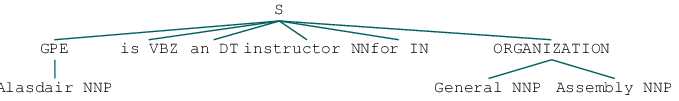

In [21]:
chunks = nltk.ne_chunk(tagged)

chunks


In [103]:
def extract_entities(text):
    entities = []
    # tokenize into sentences
    for sentence in nltk.sent_tokenize(text):
        # tokenize sentences into words
        # add part-of-speech tags
        # use NLTK's NER classifier
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        # parse the results
        entities.extend([chunk for chunk in chunks if hasattr(chunk, 'label')])
    return entities

for entity in extract_entities('Alasdair is an instructor for General Assembly'):
    print '[' + entity.label() + '] ' + ' '.join(c[0] for c in entity.leaves())

[GPE] Alasdair
[ORGANIZATION] General Assembly


### Term Frequency - Inverse Document Frequency (TF-IDF)

What:  Computes "relative frequency" that a word appears in a document
           compared to its frequency across all documents

Why:   More useful than "term frequency" for identifying "important" words in
           each document (high frequency in that document, low frequency in
           other documents)

Notes: Used for search engine scoring, text summarization, document clustering

How: 
    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [104]:
sample = ['Bob likes sports', 'Bob hates sports', 'Bob likes likes trees']

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()


In [105]:
# Each row represents a sentence
# Each column represents a word
vect.fit_transform(sample).toarray()
vect.get_feature_names()


[u'bob', u'hates', u'likes', u'sports', u'trees']

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(sample).toarray()
tfidf.get_feature_names()


[u'bob', u'hates', u'likes', u'sports', u'trees']

In [107]:
# the IDF of each word
idf = tfidf.idf_
print dict(zip(tfidf.get_feature_names(), idf))


{u'bob': 1.0, u'trees': 1.6931471805599454, u'likes': 1.2876820724517808, u'hates': 1.6931471805599454, u'sports': 1.2876820724517808}


In [108]:
###############
## Exercise ###
###############


# for each sentence in sample, find the most "interesting 
#words" by ordering their tfidf in ascending order


### LDA - Latent Dirichlet Allocation

What:  Way of automatically discovering topics from sentences

Why:   Much quicker than manually creating and identifying topic clusters

In [109]:
!pip install lda

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [110]:
import lda

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,3]) 
sentences_train = vect.fit_transform(sentences)


In [120]:
# Instantiate an LDA model
model = lda.LDA(n_topics=10, n_iter=500)
model.fit(sentences_train) # Fit the model 
n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))

INFO:lda:n_documents: 41
INFO:lda:vocab_size: 1675
INFO:lda:n_words: 2038
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -23525
INFO:lda:<10> log likelihood: -20343
INFO:lda:<20> log likelihood: -19911
INFO:lda:<30> log likelihood: -19588
INFO:lda:<40> log likelihood: -19376
INFO:lda:<50> log likelihood: -19515
INFO:lda:<60> log likelihood: -19430
INFO:lda:<70> log likelihood: -19526
INFO:lda:<80> log likelihood: -19591
INFO:lda:<90> log likelihood: -19412
INFO:lda:<100> log likelihood: -19224
INFO:lda:<110> log likelihood: -19293
INFO:lda:<120> log likelihood: -19360
INFO:lda:<130> log likelihood: -19151
INFO:lda:<140> log likelihood: -19303
INFO:lda:<150> log likelihood: -19233
INFO:lda:<160> log likelihood: -19133
INFO:lda:<170> log likelihood: -19312
INFO:lda:<180> log likelihood: -19283
INFO:lda:<190> log likelihood: -19307
INFO:lda:<200> log likelihood: -19172
INFO:lda:<210> log likelihood: -19305
INFO:lda:<220> log likelihood: -19202
INFO:lda:<230> log l

Topic 0: research, statistical, digital, information, collection, digital data, data collection, sciences, recognition
Topic 1: data, data science, science, international, conference, analytics, launched, issues, systems
Topic 2: computer, term, term data, science, term data science, used, methods, computer science, university
Topic 3: programs, analytics, april, paid, programs like, statisticians, paid programs, paid programs like, like
Topic 4: software, use, open source software, sources, source software, source, insights, present, review
Topic 5: learning, field, mining, computing, data mining, areas, intelligence, technical areas, fields
Topic 6: analysis, machine, big, journal, work, big data, learning data mining, journal data, machine learning
Topic 7: data, scientists, data scientists, published, processing, data sources, 21st, century, 21st century
Topic 8: scientist, data scientist, statistician, statistical, indian, term, lectures, mahalanobis, term statistician
Topic 9: da

array([[  5.35475234e-05,   5.35475234e-05,   5.35475234e-05, ...,
          5.35475234e-05,   5.35475234e-05,   5.35475234e-05],
       [  3.77714825e-05,   3.77714825e-05,   3.77714825e-05, ...,
          3.77714825e-05,   3.77714825e-05,   3.77714825e-05],
       [  4.95705521e-03,   4.95705521e-03,   4.95705521e-03, ...,
          4.95705521e-03,   4.95705521e-03,   4.95705521e-03],
       ..., 
       [  4.55062571e-05,   4.55062571e-05,   4.55062571e-05, ...,
          4.55062571e-05,   4.55062571e-05,   4.55062571e-05],
       [  4.72255018e-05,   4.72255018e-05,   4.72255018e-05, ...,
          4.72255018e-05,   4.72255018e-05,   4.72255018e-05],
       [  3.22841001e-05,   3.22841001e-05,   3.22841001e-05, ...,
          3.22841001e-05,   3.22841001e-05,   3.22841001e-05]])

In [121]:
# EXAMPLE: Automatically summarize a document


# corpus of 2000 movie reviews
from nltk.corpus import movie_reviews
reviews = [movie_reviews.raw(filename) for filename in movie_reviews.fileids()]


In [123]:
# create document-term matrix
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(reviews)
features = tfidf.get_feature_names()


TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [124]:
import numpy as np


In [125]:
# find the most and least "interesting" sentences in a randomly selected review
def summarize():
    
    # choose a random movie review    
    review_id = np.random.randint(0, len(reviews))
    review_text = reviews[review_id]

    # we are going to score each sentence in the review for "interesting-ness"
    sent_scores = []
    # tokenize document into sentences
    for sentence in nltk.sent_tokenize(review_text):
        # exclude short sentences
        if len(sentence) > 6:
            score = 0
            token_count = 0
            # tokenize sentence into words
            tokens = nltk.word_tokenize(sentence)
            # compute sentence "score" by summing TFIDF for each word
            for token in tokens:
                if token in features:
                    score += dtm[review_id, features.index(token)]
                    token_count += 1
            # divide score by number of tokens
            sent_scores.append((score / float(token_count + 1), sentence))

    # lowest scoring sentences
    print '\nLOWEST:\n'
    for sent_score in sorted(sent_scores)[:3]:
        print sent_score[1]

    # highest scoring sentences
    print '\nHIGHEST:\n'
    for sent_score in sorted(sent_scores, reverse=True)[:3]:
        print sent_score[1]

# try it out!
summarize()


LOWEST:

it features an idiotic script , a hack director , and a one-dimensional star who is past his prime .
resulting in his sometimes experiencing pain and sometimes nothing , as if the director forgot which way he wants to have it .
it's just dreary and unwatchable .

HIGHEST:

it is now up to arnold to save the world and find the chosen woman .
satan's numeral is actually " 999 , '' which is upside down of " 666 . ''
he quickly finds christine and does everything to protect her from all the evil forces around her , as the film includes ludicrous helicopter rescues , people jumping out of windows , satan taking a piss and dropping a match to kill arnold's partner as the piss explodes like gasoline , satan being fired at .


In [126]:
# TextBlob Demo: "Simplified Text Processing"
# Installation: pip install textblob
! pip install textblob

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [127]:
from textblob import TextBlob, Word

In [128]:
# identify words and noun phrases
blob = TextBlob('Liam and Sinan are instructors for General Assembly')
blob.words
blob.noun_phrases

WordList(['liam', 'sinan', u'general assembly'])

In [129]:
# sentiment analysis
blob = TextBlob('I hate this horrible movie. This movie is not very good.')
blob.sentences
blob.sentiment.polarity
[sent.sentiment.polarity for sent in blob.sentences]

[-0.9, -0.26923076923076916]

In [130]:
# sentiment subjectivity
TextBlob("I am a cool person").sentiment.subjectivity # Pretty subjective
TextBlob("I am a person").sentiment.subjectivity # Pretty objective
# different scores for essentially the same sentence
print TextBlob('Ian and Alasdair are instructors for General Assembly in Sydney').sentiment.subjectivity



0.5


In [131]:
# singularize and pluralize
blob = TextBlob('Put away the dishes.')
[word.singularize() for word in blob.words]

['Put', 'away', 'the', 'dish']

In [132]:
[word.pluralize() for word in blob.words]


['Puts', 'aways', 'thes', 'dishess']

In [133]:
# spelling correction
blob = TextBlob('15 minuets late')
blob.correct()

TextBlob("15 minutes late")

In [134]:
# spellcheck
Word('parot').spellcheck()


[('part', 0.9929478138222849), (u'parrot', 0.007052186177715092)]

In [135]:
# definitions
Word('bank').define()
Word('bank').define('v')

[u'tip laterally',
 u'enclose with a bank',
 u'do business with a bank or keep an account at a bank',
 u'act as the banker in a game or in gambling',
 u'be in the banking business',
 u'put into a bank account',
 u'cover with ashes so to control the rate of burning',
 u'have confidence or faith in']

In [136]:
# translation and language identification
blob = TextBlob('Welcome to the classroom.')
blob.translate(to='es')
blob = TextBlob('Hola amigos')
blob.detect_language()

HTTPError: HTTP Error 503: Service Unavailable

### 7. Regular Expressions - Regex

This is the python module for regular expressions: https://docs.python.org/2/library/re.html

Here is a google page for explaining regular expression patterns: https://developers.google.com/edu/python/regular-expressions

And here is a convenient tool for testing regular expressions: https://regex101.com/#python

Have a read of these and play around with regular expressions below and in the regex101 tool